# Data Preprocessing for sarcasm detection on youtube comments 

### Installation required python packages

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install tensorflow

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.2 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.2 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.2 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.2 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.2 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.2 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.2 kB ? eta -:--:--
     ---------------------------------- ---- 41.0/46.2 kB 98.5 kB/s eta 0:00:01
     -------------------------------------- 46.2/46.2 kB 109.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB ? eta -:--:--
   ---------------------------------------- 

## Loading dataset & Displayed some row's 

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'sarcasm_training (1).csv'
df = pd.read_csv(file_path)

In [2]:
df.head()

,text,labels
0,<user> thanks for showing up for our appointme...,1
1,haha . # lol,1
2,i love waiting <num> min for a cab - such shor...,1
3,22 super funny quotes # funnyquotes # funnysa...,1
4,goog morning # sorrynotsorry # morning,1


## Data Cleaning 

**Clean the data by handling missing values, removing duplicates column**

In [7]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(f'Duplicate rows: {df.duplicated().sum()}')

# Drop duplicates
df.drop_duplicates(inplace=True)

# Display the cleaned dataset
df.reset_index(drop=True, inplace=True)
df.head()

# Display the shape of the cleaned dataset
print(df.shape)
df.head()

text      0
labels    0
dtype: int64
Duplicate rows: 0
(19461, 2)


,text,labels
0,<user> thanks for showing up for our appointme...,1
1,haha . # lol,1
2,i love waiting <num> min for a cab - such shor...,1
3,22 super funny quotes # funnyquotes # funnysa...,1
4,goog morning # sorrynotsorry # morning,1


## Removing the emoji
**Removal of "emoji<number>" Patterns: To catch all possible formats of the "emoji<number>" strings.**

In [8]:
import pandas as pd
import re


# Function to remove emoji followed by numbers
def remove_emoji_followed_by_numbers(text):
    return re.sub(r'emoji[_\d]+', '', text)

# Apply the function to the DataFrame column
df['text'] = df['text'].apply(remove_emoji_followed_by_numbers)

# Output the modified DataFrame
print(df)

                                                    text  labels
0      <user> thanks for showing up for our appointme...       1
1                                          haha .  # lol       1
2      i love waiting <num> min for a cab - such shor...       1
3      22 super funny quotes # funnyquotes  # funnysa...       1
4                goog morning  # sorrynotsorry # morning       1
...                                                  ...     ...
19456                                 such a good read         0
19457  this is some people 's living conditions , alw...       0
19458  winner - seungyoon ( simple ) - rt if u save -...       0
19459  ok but concept : kravitz passing notes between...       0
19460                   life is good, you should get one       1

[19461 rows x 2 columns]


## Text preprocessing


**Text preprocessing includes converting text to lowercase, removing punctuation and special characters, tokenizing, and removing stopwords.**

In [9]:
print(df.columns)

Index(['text', 'labels'], dtype='object')


In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Download NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)
    # Apply preprocessing to the comments
df['cleaned_comment'] = df['text'].apply(preprocess_text)
# Display the first few rows of the preprocessed dataset
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91636\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91636\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91636\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,labels,cleaned_comment
0,<user> thanks for showing up for our appointme...,1,user thanks showing appointment today
1,haha . # lol,1,haha lol
2,i love waiting <num> min for a cab - such shor...,1,love waiting num min cab shortage user please ...
3,22 super funny quotes # funnyquotes # funnysa...,1,22 super funny quote funnyquotes funnysayings ...
4,goog morning # sorrynotsorry # morning,1,goog morning sorrynotsorry morning


## Data Visualization

**Visualize the distribution of the labels to understand the **class** balance in  dataset.**
**Represent data counts and percentage format for better understanding**

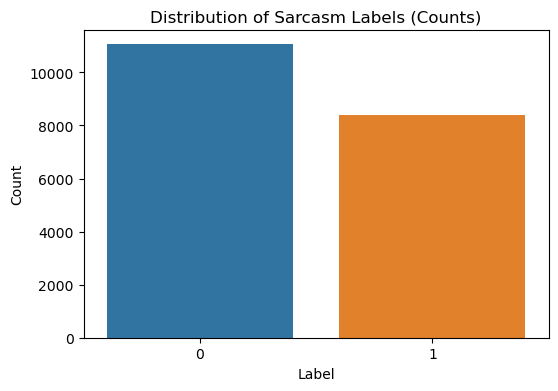

labels
0    11056
1     8405
Name: count, dtype: int64
labels
0    56.811058
1    43.188942
Name: count, dtype: float64


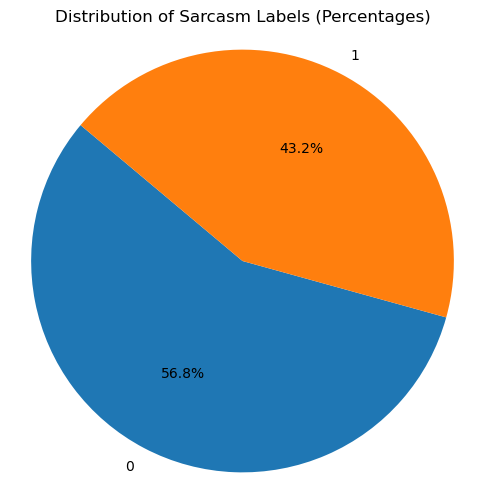

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of labels in counts (Bar Chart)
plt.figure(figsize=(6,4))
sns.countplot(x='labels', data=df)
plt.title('Distribution of Sarcasm Labels (Counts)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Display the value counts of the labels
label_counts = df['labels'].value_counts()
print(label_counts)

# Calculate the percentage distribution of labels
label_percentages = 100 * label_counts / len(df)
print(label_percentages)

# Plot the distribution of labels in percentages (Pie Chart)
plt.figure(figsize=(6,6))
plt.pie(label_percentages, labels=label_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sarcasm Labels (Percentages)')
plt.axis('equal')  
plt.show()


 ## Final Preparation

   

**Prepare the data for input into a deep learning model by splitting the data into training and testing sets, tokenizing the sequences.**

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Split the data into training and testing sets
X = df['cleaned_comment']
y = df['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
max_len = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Display the shape of the padded data
print(f'Training data shape: {X_train_pad.shape}')
print(f'Testing data shape: {X_test_pad.shape}')



Training data shape: (15568, 29)
Testing data shape: (3893, 29)


In [13]:
display(df)

,text,labels,cleaned_comment
0,<user> thanks for showing up for our appointme...,1,user thanks showing appointment today
1,haha . # lol,1,haha lol
2,i love waiting <num> min for a cab - such shor...,1,love waiting num min cab shortage user please ...
3,22 super funny quotes # funnyquotes # funnysa...,1,22 super funny quote funnyquotes funnysayings ...
4,goog morning # sorrynotsorry # morning,1,goog morning sorrynotsorry morning
...,...,...,...
19456,such a good read,0,good read
19457,"this is some people 's living conditions , alw...",0,people living condition always remember blesse...
19458,winner - seungyoon ( simple ) - rt if u save -...,0,winner seungyoon simple rt u save repost edit ...
19459,ok but concept : kravitz passing notes between...,0,ok concept kravitz passing note magnus julia p...


In [14]:
df.to_csv('processed_data2.csv', index=False)

## Summary:

**Data Preprocessing:**


1.Loaded the dataset.

2.Cleaned the dataset by removing duplicates comments and remove the Hashtag ang emojies.

3.Preprocessed the text data by converting to lowercase, removing special characters, tokenizing, and removing stop words.



**Data Visualization:**

1.Visualized the distribution of sarcasm labels and datasets using a barchart and pichart to represent counts and percentage respectivelly.



**Data Preparation for Model Training:**

1.Split the data into training and testing sets.

2.Tokenized and padded the text sequences to ensure uniform input size.


*BY NARENDRA*